<a href="https://colab.research.google.com/github/ishananand06/Fashion-MNIST-Classifier/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from tqdm.notebook import tqdm
import time

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
c = torchvision.transforms.Compose([
    ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
input_size = 784
hidden_size = 128
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [ ]:
train_dataset = datasets.FashionMNIST(root = "/content", train=True, download=True, transform=c)
test_dataset = datasets.FashionMNIST(root = "/content", train=False, download=True, transform=c)

In [ ]:
train_loader= DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader= DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)
)

In [ ]:
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
model.train()
start_time = time.time()
for epoch in range(num_epochs):
  loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
  running_loss = 0.0
  for batch_idx, (data, targets) in enumerate(tqdm(train_loader)):
    output = model(data)
    loss = criterian(output, targets)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    running_loss += loss.item()
    loop.set_postfix(loss=loss.item())
  avg_loss = running_loss / len(train_loader)
  print(f"Epoch [{epoch+1}/{num_epochs}] Average Loss: {avg_loss:.4f}")
print(f"Total Training Time: {time.time() - start_time:.2f}s")

Epoch 1/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [1/10] Average Loss: 0.1712


Epoch 2/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [2/10] Average Loss: 0.1699


Epoch 3/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [3/10] Average Loss: 0.1627


Epoch 4/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [4/10] Average Loss: 0.1582


Epoch 5/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [5/10] Average Loss: 0.1561


Epoch 6/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [6/10] Average Loss: 0.1512


Epoch 7/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [7/10] Average Loss: 0.1477


Epoch 8/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [8/10] Average Loss: 0.1423


Epoch 9/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [9/10] Average Loss: 0.1393


Epoch 10/10:   0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [10/10] Average Loss: 0.1367
Total Training Time: 134.69s


In [16]:
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for data, targets in tqdm(test_loader):
    output = model(data)
    _, predicted = torch.max(output.data, 1)
    total += targets.size(0)
    correct += (predicted == targets).sum().item()

  print(f"Test Accuracy: {100 * correct / total}%")

  0%|          | 0/100 [00:00<?, ?it/s]

Test Accuracy: 88.23%


Showing 10 mistakes:



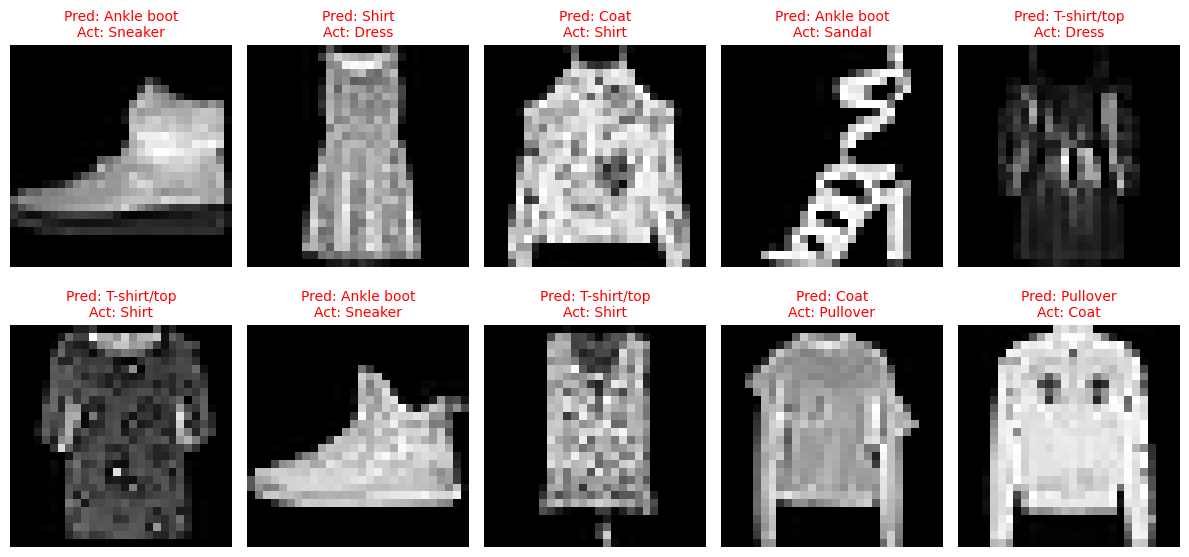

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the class names (so we aren't looking at numbers 0-9)
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# 2. Collect mistakes
mistakes = []
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        # Compare prediction vs label
        for i in range(len(preds)):
            if preds[i] != labels[i]:
                mistakes.append({
                    'image': images[i],
                    'true': labels[i].item(),
                    'pred': preds[i].item()
                })

        # Stop once we have enough to display (e.g., 10)
        if len(mistakes) >= 10:
            break

# 3. Plot them
fig = plt.figure(figsize=(12, 6))
print(f"Showing {len(mistakes[:10])} mistakes:\n")

for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    error = mistakes[i]

    # Un-normalize the image for display
    # (Original range was [-1, 1], we move it back to [0, 1])
    img = error['image'].squeeze().numpy()
    img = img * 0.5 + 0.5

    ax.imshow(img, cmap='gray')

    # Set title: "Pred: [Wrong] (Act: [Right])"
    ax.set_title(f"Pred: {classes[error['pred']]}\nAct: {classes[error['true']]}",
                 color='red', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

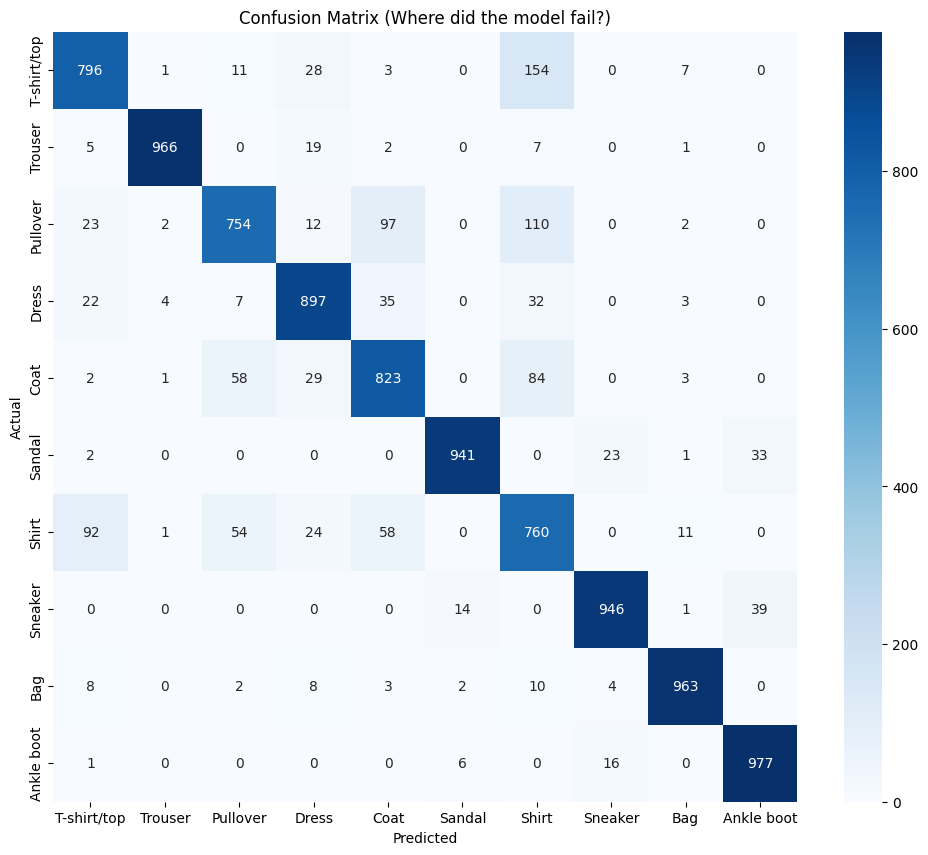

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Collect all predictions
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.numpy())
        y_true.extend(labels.numpy())

# 2. Create the Matrix
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

# 3. Plot
plt.figure(figsize=(12, 10))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Where did the model fail?)")
plt.show()